In [2]:
%matplotlib inline
from pylab import *
import cv2
from image_defs import *

## Get the image slicing to work with one image

- You need a thresholded (black and white)
- you may need to truncate the image to omit stuff outside the board

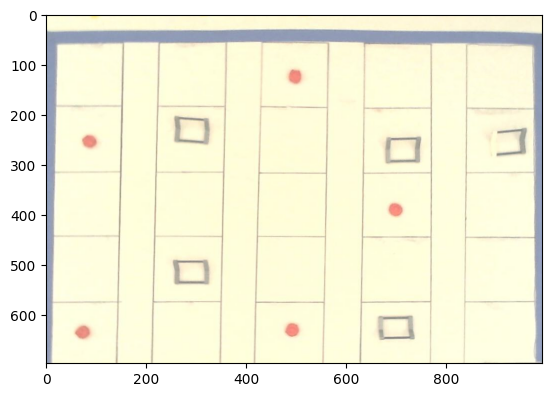

In [3]:
image=imread(f"images/im3.jpg")
imshow(image)

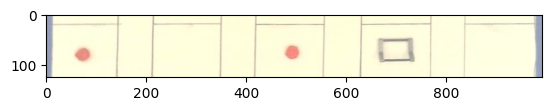

In [25]:
count=0
sqr=125
sqc=160
buf_c=45

init_buf_r=55

r=4


start_im_r=r*sqr+init_buf_r
end_im_r=start_im_r+sqr

imshow(image[start_im_r:end_im_r,:])



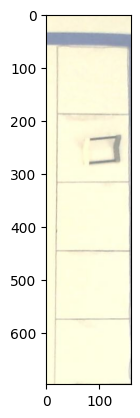

In [16]:
count=0
sqr=120
sqc=160
buf_c=45

c=4


start_im_c=c*sqc+c*buf_c
end_im_c=start_im_c+sqc

imshow(image[:,start_im_c:end_im_c])



In [26]:
from Game import Board
state=Board('00100/12022/00010/02000/10120')
print(state)
nr,nc=state.shape


 0  0  1  0  0 
 1  2  0  2  2 
 0  0  0  1  0 
 0  2  0  0  0 
 1  0  1  2  0 



In [35]:
import os

Making folder images/2024-11-26 - im3 training squares
Making folder images/2024-11-26 - im3 training squares/piece_0
images/2024-11-26 - im3 training squares/piece_0/square0_0.jpg
images/2024-11-26 - im3 training squares/piece_0/square1_0.jpg
Making folder images/2024-11-26 - im3 training squares/piece_1
images/2024-11-26 - im3 training squares/piece_1/square2_1.jpg
images/2024-11-26 - im3 training squares/piece_0/square3_0.jpg
images/2024-11-26 - im3 training squares/piece_0/square4_0.jpg
images/2024-11-26 - im3 training squares/piece_1/square5_1.jpg
Making folder images/2024-11-26 - im3 training squares/piece_2
images/2024-11-26 - im3 training squares/piece_2/square6_2.jpg
images/2024-11-26 - im3 training squares/piece_0/square7_0.jpg
images/2024-11-26 - im3 training squares/piece_2/square8_2.jpg
images/2024-11-26 - im3 training squares/piece_2/square9_2.jpg
images/2024-11-26 - im3 training squares/piece_0/square10_0.jpg
images/2024-11-26 - im3 training squares/piece_0/square11_0.jp

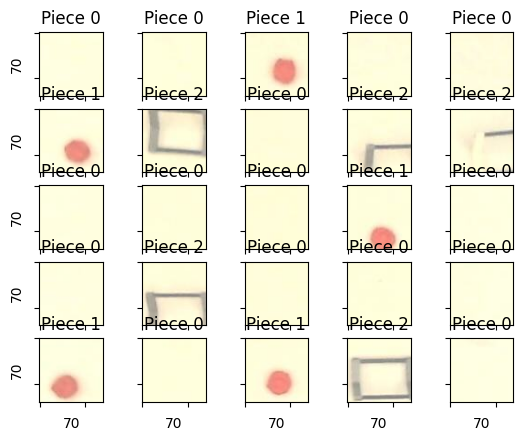

In [37]:
training_squares_folder='images/2024-11-26 - im3 training squares'

if not os.path.exists(training_squares_folder):
    print(f"Making folder {training_squares_folder}")
    os.mkdir(training_squares_folder)



nr,nc=state.shape
saveit=True

sqr=125
sqc=160
buf_c=45
init_buf_r=55


count=0
squares=[]
for r in range(nr):
    for c in range(nc):

        start_im_c=c*sqc+c*buf_c
        end_im_c=start_im_c+sqc

        start_im_r=r*sqr+init_buf_r
        end_im_r=start_im_r+sqr

        im_square=image[start_im_r:end_im_r,start_im_c:end_im_c]

        # extract the middle 50x50

        sq_sz=70
        sz=im_square.shape
        start_r=sz[0]//2-sq_sz//2
        start_c=sz[1]//2-sq_sz//2
        im_square=im_square[start_r:start_r+sq_sz,start_c:start_c+sq_sz]

        
        squares.append(im_square)

        
        subplot(nr,nc,count+1)
        imshow(squares[count])

        shape=squares[count].shape
        piece=state.board[count]
        
        title(f"Piece {piece}")
        if c==0:
            ylabel(shape[0])

        if r==nr-1:
            xlabel(shape[1])
        gca().set_xticklabels([])
        gca().set_yticklabels([])


        if saveit:
            piece_folder=f"{training_squares_folder}/piece_{piece}"
            if not os.path.exists(piece_folder):
                print(f"Making folder {piece_folder}")
                os.mkdir(piece_folder)
            
            fname=f"{piece_folder}/square{count}_{piece}.jpg"
            print(fname)
            imsave(fname,squares[count])
        
        
        count+=1        
